# Exploring Data with Python using Jupyter Notebooks

- Special Thanks to Galvanize for the basis of this Jupyter Notebook!

### Objectives

- use Python and Pandas to analyse a dataset of Hotel Receipts

### Possible Business Goals

This document will get part-way (more-or-less) to each of the following business goals:

1. Inform an investor where he should build his next hotel (a first-pass market research effort).

2. Hilton has hired you to do an analysis for their hotels in Texas.

3. Identify best months for hotels in San Antonio to offer sales and promotions to drive profit.

# Import the libraries we'll need.

In python, you use the `import` statement to load libraries into your script.

In [1]:
# matplotlib is used for...you guessed it: plotting!
from matplotlib import pyplot as plt

# Pandas is the "Python Data Analysis Library". We use it for loading data from disk and
# for manipulating and printing data.
import pandas as pd

# This next line is a Jupyter directive. It tells Jupyter that we want our plots to show
# up right below the code that creates them.
%matplotlib inline

Pandas by default will not print every column in our data if there are A LOT of columns. For this notebook, we would prefer that Pandas print all the columns no matter what, so let's tell Pandas our wishes:

In [2]:
pd.set_option('display.max_columns', None)

# Let's read some data!

This data was obtained from https://data.texas.gov/

In [3]:
hotel_data_raw = pd.read_csv("../Data/Hotel_Tax.csv")

In [4]:
type(hotel_data_raw)

pandas.core.frame.DataFrame

### Woo! We have data. Now let's look at it!

Pandas makes it easy to peek into your data and see what you have. The first step in any data project is to get to know your data.

Let's start by looking at the first 3 rows of data. That's easy to do using the `head()` method on our DataFrame:

In [5]:
hotel_data_raw.head()

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation
0,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,155,(PB 114) TERRY L CARTER,2012 HWY 361 #114,PORT ARANSAS,TX,78373,178.0,1,$6010.00,$6010.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #114\nPORT ARANSAS, TX 78373\n"
1,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,156,(PB 205) LARRY OR VICKY MURPHY,2012 HWY 361 # 205,PORT ARANSAS,TX,78373,178.0,1,$9855.00,$9855.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 # 205\nPORT ARANSAS, TX 78373\n"
2,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,194,(PB101) STEVEN AND MARY MORGAN,2012 HWY 361 #101,PORT ARANSAS,TX,78373,178.0,1,$9425.00,$9425.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #101\nPORT ARANSAS, TX 78373\n"
3,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,192,(PB202) SANDRA ELROD,2212 STATE HIGHWAY 361 # 202,PORT ARANSAS,TX,78373,178.0,1,$0.00,$0.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2212 STATE HIGHWAY 361 # 202\nPORT ARANSAS, TX..."
4,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,196,(PB206) LARRY OR VICKEY MURPHY,2122 STATE HIGHWAY 361 # 206,PORT ARANSAS,TX,78373,178.0,1,$6810.00,$6810.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2122 STATE HIGHWAY 361 # 206\nPORT ARANSAS, TX..."


Looks good at first glance. We'll dig in more later, but first let's ask Pandas to give us info about the datatype of each columns:

In [6]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977 entries, 0 to 17976
Data columns (total 21 columns):
Month                         17977 non-null int64
Year                          17977 non-null int64
Taxpayer Number               17977 non-null int64
Taxpayer Name                 17977 non-null object
Taxpayer Address              17977 non-null object
Taxpayer City                 17977 non-null object
Taxpayer State                17975 non-null object
Taxpayer Zip                  17975 non-null float64
Taxpayer County               17977 non-null int64
Outlet Number                 17977 non-null int64
Location Name                 17977 non-null object
Location Address              17977 non-null object
Location City                 17977 non-null object
Location State                17977 non-null object
Location Zip                  17977 non-null int64
Location County               17975 non-null float64
Location Room Capacity        17977 non-null int64
Location Tot

Most of the stuff above looks correct:
- _Month_ is encoded as an integer, so pandas is correct in identifying the _Month_ column as an integer.
- _Name_, _Address_, _City_, and _State_ are correctly identified as strings (that's what pandas means when it says something is an object).
- _County_ is also encoded as an integer, so pandas is correct again.
- ... etc...

There are a few things above that don't look right:
- Why is _Taxpayer Zip_ a floating point number?
- Why is _Location County_ a floating point number?
- _Location Tot Room Receipts_ has a dollar sign in it which is why pandas thinks it's a string instead of a number.
- Ditto for _Location Taxable Receipts_.

# Let's clean our data.

We idenified four issues above, so let's fix each one.

In [7]:
# Let's work in a new DataFrame so that we don't loose our original data.
# (It's often useful to have the original data on-hand.)
import copy
hotel_data = copy.deepcopy(hotel_data_raw)

In [8]:
# Convert _Taxpayer Zip_ to an integer.
hotel_data['Taxpayer Zip'] = hotel_data['Taxpayer Zip'].fillna(0).astype(int)
#test_col2 = hotel_data['Taxpayer Zip'].fillna(0).apply(lambda x: int(x))
#test_col3 = [int(x) for x in hotel_data['Taxpayer Zip'].fillna(0).tolist()]

In [9]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977 entries, 0 to 17976
Data columns (total 21 columns):
Month                         17977 non-null int64
Year                          17977 non-null int64
Taxpayer Number               17977 non-null int64
Taxpayer Name                 17977 non-null object
Taxpayer Address              17977 non-null object
Taxpayer City                 17977 non-null object
Taxpayer State                17975 non-null object
Taxpayer Zip                  17977 non-null int32
Taxpayer County               17977 non-null int64
Outlet Number                 17977 non-null int64
Location Name                 17977 non-null object
Location Address              17977 non-null object
Location City                 17977 non-null object
Location State                17977 non-null object
Location Zip                  17977 non-null int64
Location County               17975 non-null float64
Location Room Capacity        17977 non-null int64
Location Tot R

In [10]:
# Convert _Location County_ to an integer.
hotel_data["Location County"] = hotel_data["Location County"].fillna(0).astype(int)

In [11]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977 entries, 0 to 17976
Data columns (total 21 columns):
Month                         17977 non-null int64
Year                          17977 non-null int64
Taxpayer Number               17977 non-null int64
Taxpayer Name                 17977 non-null object
Taxpayer Address              17977 non-null object
Taxpayer City                 17977 non-null object
Taxpayer State                17975 non-null object
Taxpayer Zip                  17977 non-null int32
Taxpayer County               17977 non-null int64
Outlet Number                 17977 non-null int64
Location Name                 17977 non-null object
Location Address              17977 non-null object
Location City                 17977 non-null object
Location State                17977 non-null object
Location Zip                  17977 non-null int64
Location County               17977 non-null int32
Location Room Capacity        17977 non-null int64
Location Tot Roo

In [12]:
# Convert _Location Tot Room Receipts_ to a float.
hotel_data["Location Tot Room Receipts"] = hotel_data["Location Tot Room Receipts"]\
.apply(lambda x: float(x.lstrip('\$')))


In [13]:
# Convert _Location Taxable Receipts_ to a float.
hotel_data["Location Taxable Receipts"] = hotel_data["Location Taxable Receipts"]\
.apply(lambda x: float(x.lstrip('\$')))

Again, let's have pandas give us info about what it thinks the datatype of each column is. It should all look good now:

In [14]:
hotel_data.head()

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation
0,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,155,(PB 114) TERRY L CARTER,2012 HWY 361 #114,PORT ARANSAS,TX,78373,178,1,6010.0,6010.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #114\nPORT ARANSAS, TX 78373\n"
1,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,156,(PB 205) LARRY OR VICKY MURPHY,2012 HWY 361 # 205,PORT ARANSAS,TX,78373,178,1,9855.0,9855.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 # 205\nPORT ARANSAS, TX 78373\n"
2,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,194,(PB101) STEVEN AND MARY MORGAN,2012 HWY 361 #101,PORT ARANSAS,TX,78373,178,1,9425.0,9425.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #101\nPORT ARANSAS, TX 78373\n"
3,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,192,(PB202) SANDRA ELROD,2212 STATE HIGHWAY 361 # 202,PORT ARANSAS,TX,78373,178,1,0.0,0.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2212 STATE HIGHWAY 361 # 202\nPORT ARANSAS, TX..."
4,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,196,(PB206) LARRY OR VICKEY MURPHY,2122 STATE HIGHWAY 361 # 206,PORT ARANSAS,TX,78373,178,1,6810.0,6810.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2122 STATE HIGHWAY 361 # 206\nPORT ARANSAS, TX..."


In [15]:
age = 31
money = 5
print("I am %d years old with $%d dollars" % (age,money))

I am 31 years old with $5 dollars


In [16]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977 entries, 0 to 17976
Data columns (total 21 columns):
Month                         17977 non-null int64
Year                          17977 non-null int64
Taxpayer Number               17977 non-null int64
Taxpayer Name                 17977 non-null object
Taxpayer Address              17977 non-null object
Taxpayer City                 17977 non-null object
Taxpayer State                17975 non-null object
Taxpayer Zip                  17977 non-null int32
Taxpayer County               17977 non-null int64
Outlet Number                 17977 non-null int64
Location Name                 17977 non-null object
Location Address              17977 non-null object
Location City                 17977 non-null object
Location State                17977 non-null object
Location Zip                  17977 non-null int64
Location County               17977 non-null int32
Location Room Capacity        17977 non-null int64
Location Tot Roo

Woot! This time the datatypes look correct. So, datatypes are good... next we'll look at the content of our data.

# Exploratory Data Analysis

### Sanity Check

Let's look at the head again. It should be the same as before, but we'll look again to remind ourselves what it looks like.

In [17]:
hotel_data.head()

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation
0,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,155,(PB 114) TERRY L CARTER,2012 HWY 361 #114,PORT ARANSAS,TX,78373,178,1,6010.0,6010.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #114\nPORT ARANSAS, TX 78373\n"
1,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,156,(PB 205) LARRY OR VICKY MURPHY,2012 HWY 361 # 205,PORT ARANSAS,TX,78373,178,1,9855.0,9855.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 # 205\nPORT ARANSAS, TX 78373\n"
2,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,194,(PB101) STEVEN AND MARY MORGAN,2012 HWY 361 #101,PORT ARANSAS,TX,78373,178,1,9425.0,9425.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #101\nPORT ARANSAS, TX 78373\n"
3,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,192,(PB202) SANDRA ELROD,2212 STATE HIGHWAY 361 # 202,PORT ARANSAS,TX,78373,178,1,0.0,0.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2212 STATE HIGHWAY 361 # 202\nPORT ARANSAS, TX..."
4,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,196,(PB206) LARRY OR VICKEY MURPHY,2122 STATE HIGHWAY 361 # 206,PORT ARANSAS,TX,78373,178,1,6810.0,6810.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2122 STATE HIGHWAY 361 # 206\nPORT ARANSAS, TX..."


I'm noticing something that might be wrong. We'll have to keep this in mind as we move forward: Why is 'Location Room Capacity' equal 1 for these rows? Are these hotels with just one room each? Maybe... we'll keep this in mind.

For now let's get an idea about the distribution of the 'Location Room Capacity' column. We'll create a histogram over this column.

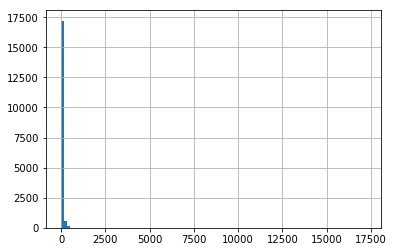

In [18]:
## Plot histogram of room capacity
hotel_data['Location Room Capacity'].hist(bins=100)

... well... that wasn't very informative! That's okay, let's try again. This time we'll only look at rows where the 'Location Room Capacity' is less than 50; this will make us sort-of "zoom in" on the part that's most interesting:

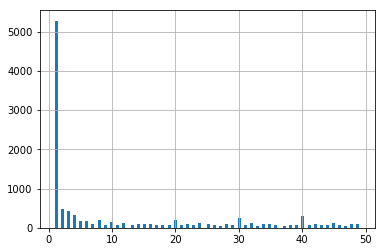

In [19]:
## Subset rows of room capacity
hotel_data[hotel_data['Location Room Capacity']<50]\
['Location Room Capacity'].hist(bins=100)

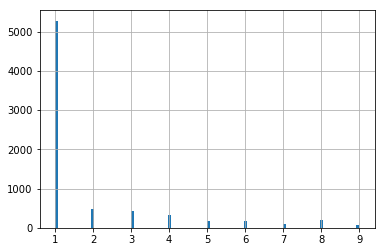

In [20]:
## Replot room capacity 
hotel_data[hotel_data['Location Room Capacity']<10]\
['Location Room Capacity'].hist(bins=100)

Humm... is that spike at 'Location Room Capacity' == 1? Let's find out.

In [21]:
## Find how many have Capacity == 1
hotel_data[hotel_data['Location Room Capacity'] == 1].shape

(5276, 21)

... yep, that spike is at 'Location Room Capacity' == 1.

There seems to be way too many hotels with 'Location Room Capacity' == 1. It's possible that whoever created this dataset is filling all "unknown values" with the value 1.

In [22]:
# The lines below drop the 'bad' rows in the dataset.
# Rerun on second time through. 

#print("Orig size:", dataframe.shape)
#dataframe = dataframe[dataframe['Location Room Capacity'] > 1]
#print("New size:", dataframe.shape)

### Visualization (histograms and scatterplots)

#### Number of States Represented

Let's see what states are represented in this data. (It _should_ only be Texas, but let's check.)

In [23]:
## Group dataframe by state


In [24]:
## Plot histogram of records


... We have some non-Texas stuff in here! Let's get a textual printout for more detail.

In [25]:
## Display the counts for each value


... Indiana... what's up with that? Let's keep only the Texas rows.

In [26]:
## Subset to only Texas rows


#### Number of Cities Represented

How many unique cities are represented?

In [27]:
# How many unique cities are in our dataset?


#### Histogram: Number of unique hotels in each city

In [28]:
# Count the number of unique hotels in each city:

## Group Texas df by city and get counts


In [29]:
## Sort values by counts


In [30]:
## Get top 50 cities


In [31]:
## Plot a barchart of unique hotels


#### Exploring the numeric columns

In [32]:
# Now let's focus on the numeric columns.
# Create a list of the numeric columns


In [33]:
# Let's look at some stats for our numeric columns:


#### Pairplot over a few numeric columns-of-interest

For this dataset, this turns out to not be very interesting, but it's good to always look at this anyway!

A _pairplot_ (also known as a _scatter matrix_) will plot every column vs every other column. It's a quick way to see which pairs of columns are correlated (or not).

In [34]:
## Define columns of interest
cols_of_interest = ['Location Room Capacity', 'Location Tot Room Receipts',
                    'Location Taxable Receipts']

In [35]:
## Create a pairplot using seaborn


#### Compare two cities: Scatterplot 'Location Room Capacity' vs 'Location Tot Room Receipts' for each city

Does it seem that Austin and El Paso are different, or are they basically the same? (We'll explore this more further later on, but for now let's just look at the pretty picture and make our best guess.)

In [36]:
# Define cities of interest
cities_of_interest = ['AUSTIN', 'EL PASO']

In [37]:
### Use matplotlib for this! 
# Scatter plot by city.

    # Filter to only the city

    # Filter to large room capacity hotels

    # Plot Room receipts versus capacity 


# Label the axis


Humm... I don't know about you, but I didn't expect this! There are two things here that surprised me:
1. The trend-line is not very strong. There is a general upward trend, but it is riddled with noise.
2. These cities do not differ much! Average income per room is roughly the same in each city.

The takeaway (this is usually the takeaway), is two-fold:
1. Your data is probably not as clean asd pretty as you'd like, and
2. Often your assumptions about what you will find are just plain wrong.

... Seeing this now changes the direction I was planning to head. That's why we do Exploratory Data Analysis! 

Also: Imagine this senario: Your investor friend was told that Austin is in desparate need of hotels--that there is more demand than supply and that it would be a great time to build a hotel in Austin because you could get amazing ROI. Your investor friend comes to you to varify this. We're not finished with our analysis yet, but it's not looking good for that theory so far.

#### Histogram of every numeric column

This is another graph that you should make for every dataset you get. It is often useful. For this dataset, it's less useful though. :(

In [38]:
# Create histograms of numeric columns


#### Years and Months, what do we have of each?

We only have one year (2015), see:

In [39]:
# How many hotels do we have of each year? 


We only have two months (July and August), see:

In [40]:
# Looks like these are all from 2015. Let's see how many
# of each month we have.


#### Histogram: Avg 'room capacity' per city (top cities only)

In [41]:
## Group by Capacity


In [42]:
## Sort the counts


In [43]:
## Plot barchart of counts >110


#### Histogram: Avg income per room per night per city (top cities only)

In [44]:
num_days = 31 + 31  # <-- both July and August each have 31 days in them.
## Group Texas by City


In [45]:
## Get total receipts


In [46]:
## Get total room capacity


In [47]:
## Get income per room per night


In [48]:
## Sort income per room per night


In [49]:
## Find most profitable cities


In [50]:
## Plot most profitable cities


#### RED ALERT: What's up with SOUTHLAKE?

In [51]:
# What's up with SOUTHLAKE?


Our data says that this hotel in Southlake has only one room. Let's look into whether or not that's true. Here's the website for that hotel in Southlake:
http://www3.hilton.com/en/hotels/texas/hilton-dallas-southlake-town-square-DFWSLHF/index.html

Okay... that hotel above definitely has more than one room! Remember how we concidered dropping rows where 'Location Room Capacity' == 1? Well, I think it's time to pull the trigger on that decision. 

__HINT: THERE IS CODE IN ONE OF THE CELLS ABOVE THAT DOES THIS, BUT IT IS COMMENTED OUT--ALL YOU NEED TO DO IS UNCOMMENT THAT CODE AND RUN ALL THE CELLS FROM THERE TO HERE AGAIN. NOTICE WHAT CHANGES AS YOU RE-RUN EACH CELL.__

#### Is there much of a difference between the month of July and the month of August?

In [52]:
# How does the specific month affect the avg income per room per night?

## Group Texas by City and Month


In [53]:
## Sum the total room receipts


In [54]:
## Sum the total capacity


In [55]:
## Calculate income per room per night


In [56]:
## Unstack grouped calculation


In [57]:
## Calculate average of July and August


In [58]:
## Sort averages


In [59]:
## Identify most profitable cities


In [60]:
## Plot most profitable cities


Haha. Buda had a great month of July! (Or it was a data entry error.) It does seem that in general, the month of July was better for hotels than the month of August. The graph above only shows the top cities, let's look at ALL cities and compare the July vs Auguest.

In [61]:
# Seems July (7) was a better month for the top cities than August (8). Let's see if this
# was overall true for the entire dataset.


Yep. Seems like on average hotels' month of July was better than August.

... but... remember how we saw that Buda had a REALLY GOOD month of July? We need to look into that more. We'll leave that as an exercise for you! Figure out if:
1. Buda really did have a REALLY GOOD month in July, or
2. We are seeing some data-entry error... in which case we need to fix it and re-run our analysis.